---
jupyter: false
---

# 00 | Klotho Foundations | 01 | Intro to Klotho


`Klotho` is an open source computer-assisted composition toolkit implemented in Python. It is designed to work in tandem with external synthesis applications and as a resource for the methods, models, works, and frameworks associated with music composition and metacomposition.

Klotho adapts to multiple Python workflows: traditional scripting, interactive notebook and browser-based environments, and immediate computational tasks through the interpreter.

The name comes from the Ancient Greek *κλώθω* (klṓthō), meaning "to spin." (The mythological figure Clotho, one of the three Fates, takes her name from this same word.) In that spirit, Klotho spins together elements of musical computation into a working system for computer-aided composition (CAC).

Klotho extends from a lineage of computer-assisted composition (CAC) theories, practices, and software environments. While it provides support for conventional musical materials, its strengths are best utilized when working with complex, abstract, or otherwise unconventional musical structures not easily accessible with traditional notation software or digital audio workstations.

---

## Instruments & Ensembles

Even though our music is realized by a computer, Klotho frames composition as [ensemble writing](https://en.wikipedia.org/wiki/Musical_ensemble). Every musical event is performed by an instrument. A piece of music is composed of a sequence of actions performed by an instrument, either alone or in concert with other instruments.

### Instruments

An **instrument** is a reference to a particular sound-producing system, whether acoustic, analog, or digital. The **pfields** (short for **parameter fields**) are that system's parameters, specified as arguments. The instrument definition declares what those parameters are, their ranges, and their default values.

#### Kits

> *Coming soon.*

### Ensembles

> *Coming soon.*

---

## Events

### The Event List Paradigm

The output of any Klotho process is ultimately an **event list**: an ordered collection of discrete musical events.

The idea goes back at least to CSound (1985), where a "score" is literally a text file of events. In its most general form, an event is:

$$\text{event} = (\text{onset},\; \text{duration},\; \text{instrument},\; \text{pfields})$$

- **onset**: the absolute start time in seconds.
- **instrument**: which sound-producing process to use.
- **pfields**: an ordered list of parameter fields that the instrument expects.

Frequency, amplitude, spatial position, filter cutoff: all pfields. What goes in the list depends entirely on what the instrument defines. The event itself is agnostic.

A piece of music can be reduced to an ordered list of such tuples.

You can think of the event list as a kind of "musical [assembly language](https://en.wikipedia.org/wiki/Assembly_language)". Like actual assembly language, there is value in understanding it, but writing it directly is rarely practical. It is slow, yes, but that is not the only problem. Working at such a low level makes it difficult to reason about form, structure, and large-scale relationships. The note-by-note perspective obscures the compositional one. 

This is why we build higher-level languages: not just to save time, but to think at a different level of abstraction. Klotho works the same way. We describe musical structures using high-level abstractions in Python, and Klotho compiles them into event lists for playback.

---

## Relational Meta-Structures

Regardless of tradition, music involves relationships between things. Pitch relates to pitch, pitch relates to time, dynamics relate to both. An ordered sequence of `(onset, pitch)` pairs defines a melody; each pair describes a relationship explicitly, but each pair in the sequence produces implicit relationships in adjacency and in aggregate. Fold in [timbre](https://en.wikipedia.org/wiki/Timbre) as well and the same structure carries even richer relational information. 

At the level of form, relationships persist: proportional duration between sections, pitch material and instrumentation, rhythmic density and register, and so on. 

This even extends to music that forgoes conventional notions of pitch and rhythm entirely. [Acousmatic](https://en.wikipedia.org/wiki/Acousmatic_music) work still operates through association, contrast, and continuity, all of which are relational.

A **graph** is a mathematical structure for modeling pairwise relations between objects, and it fits this situation well. Graphs are both highly general and precisely specific: a single formalism can represent a wide range of structures while capturing the exact shape of each one.

### Graphs

Formally, a graph consists of:

- A set of **vertices** (also called *nodes*).
- A set of **edges** (also called *links*) connecting pairs of vertices.

Nodes are objects; edges are relationships between them.

This is a graph:

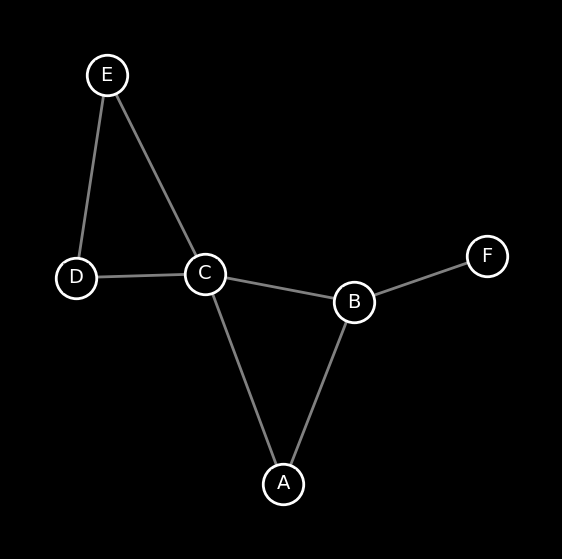

In [1]:
from klotho import Graph, Tree, Lattice, plot

labels = ["A", "B", "C", "D", "E", "F"]

g_random = Graph.random_graph(6, p=0.35, labels=labels, seed=111)
plot(g_random, attributes=["label"], layout="spring", k=0.45, figsize=(7, 7), node_size=850, font_size=14)

So is this:

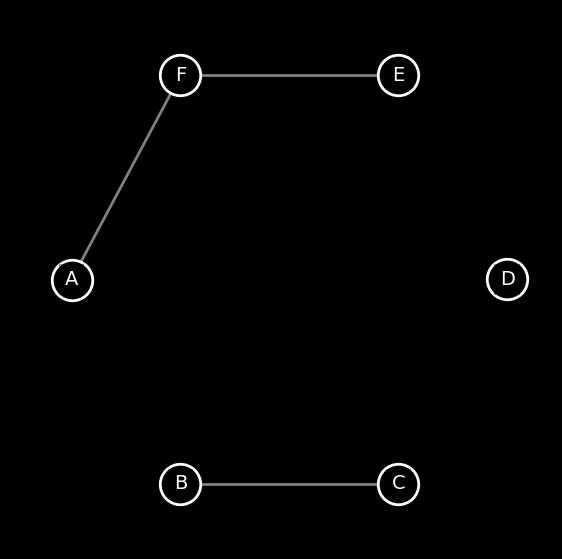

In [2]:
g_sparse = Graph.random_graph(6, p=0.2, labels=labels, seed=212)
plot(g_sparse, attributes=["label"], layout="shell", figsize=(7, 7), node_size=850, font_size=14)

And so is this:

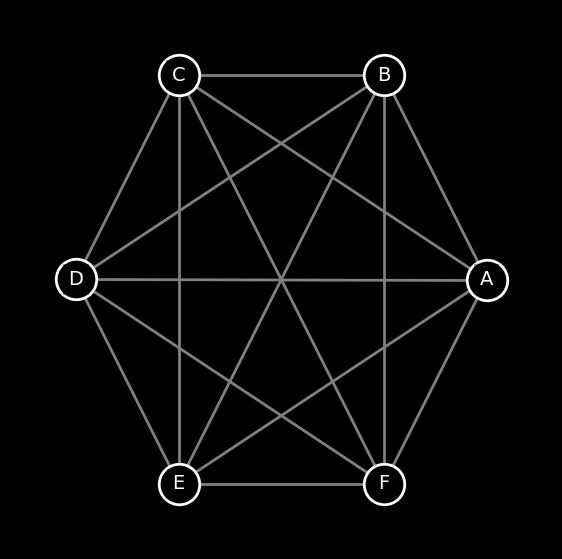

In [3]:
g_complete = Graph.complete_graph(6, labels=labels)
plot(g_complete, attributes=["label"], layout="circular", figsize=(7, 7), node_size=850, font_size=14)

This too:

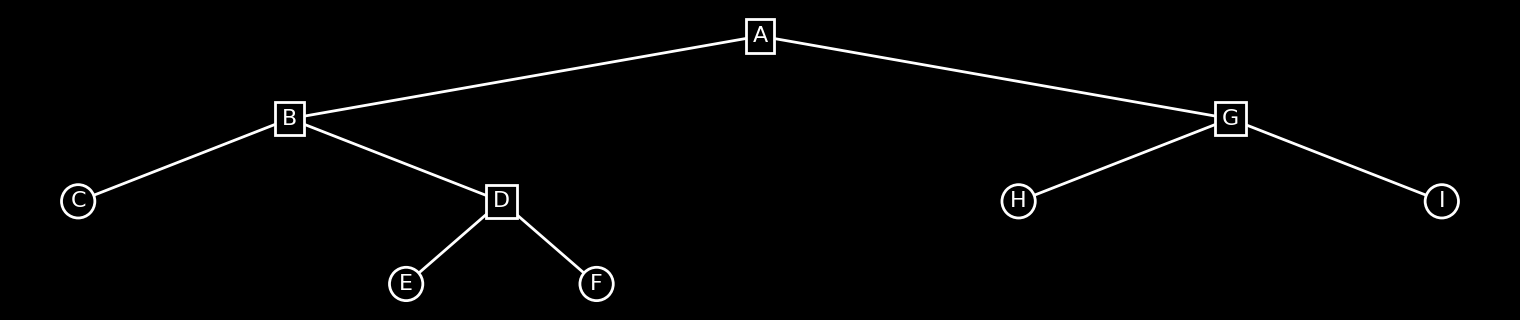

In [4]:
plot(Tree('A', (('B', ('C', ('D', ('E', 'F')))), ('G', ('H', 'I')))), figsize=(15, 3))

Yup, also a graph:

In [5]:
plot(Lattice(dimensionality=2, resolution=3), figsize=(7, 7))